In [22]:


import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics

labels = ["S 1","S 2","S 3","S 4","S 5",
         "M 1","M 2","M 3","M 4","M 5",
         "L 1","L 2","L 3","L 4","L 5"]

data_cpp = []


for label in labels:
    row = {}
    _data = pd.read_csv("../" + "CppResults" + "/" + label + ".csv")
    row["label"] = label
    row["AverageTime"] = statistics.mean(_data["IndividualTime"])
    row["IndividualTimes"] = _data["IndividualTime"]
    row["VertexCount"] = _data["VertexCount"][0]
    row["IndicesCount"] = _data["IndicesCount"][0]
    row["TriangleCount"] = _data["TriangleCount"][0]
    data_cpp.append(row)

data_csharp = []
for label in labels:
    row = {}
    _data = pd.read_csv("../" + "CSharpResults" + "/" + label + ".csv")
    row["label"] = label
    row["AverageTime"] = statistics.mean(_data["AverageTime"])
    row["IndividualTimes"] = _data["TotalTime"]
    row["VertexCount"] = _data["VertexCount"][0]
    row["IndicesCount"] = _data["IndicesCount"][0]
    row["TriangleCount"] = _data["TriangleCount"][0]
    data_csharp.append(row)

data_json = []
for label in labels:
    row = {}
    f = open("../" + "JsonFiles" + "/" + label + ".json")
    _data = json.load(f)
    row["label"] = label
    row["VertexCount"] = len(_data["x"])
    row["IndicesCount"] = len(_data["indices"])
    data_json.append(row)

In [9]:
type(data_json)

list

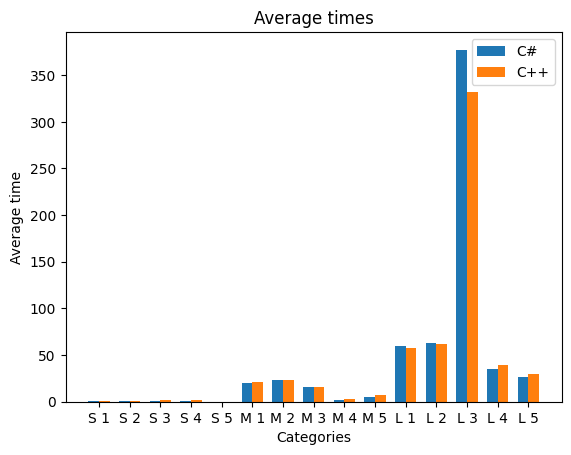

In [42]:

positions = np.arange(len(labels))
bar_width = 0.35

plt.bar(positions - bar_width / 2, [row["AverageTime"] for row in data_csharp], width=bar_width, label='C#')

plt.bar(positions + bar_width / 2, [row["AverageTime"] for row in data_cpp], width=bar_width, label='C++')


plt.xlabel('Categories')
plt.ylabel('Average time')
plt.title('Average times')
plt.xticks(positions, labels)
plt.legend()

plt.show()


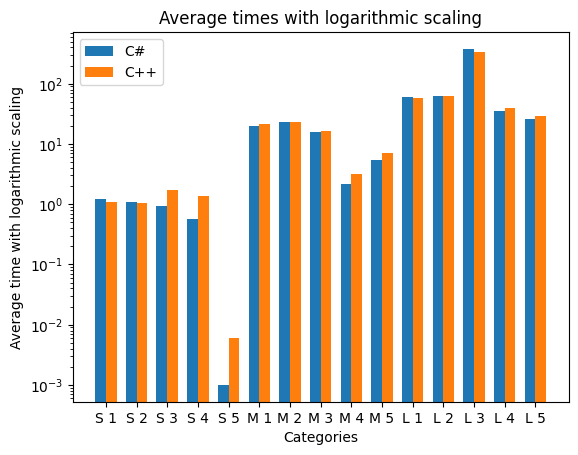

In [43]:

positions = np.arange(len(labels))
bar_width = 0.35

plt.bar(positions - bar_width / 2, [row["AverageTime"] for row in data_csharp], width=bar_width, label='C#')

plt.bar(positions + bar_width / 2, [row["AverageTime"] for row in data_cpp], width=bar_width, label='C++')


plt.xlabel('Categories')
plt.ylabel('Average time with logarithmic scaling')
plt.title('Average times with logarithmic scaling')
plt.xticks(positions, labels)
plt.legend()
plt.yscale('log')
plt.show()



In [44]:
df_cpp = pd.DataFrame()
for row in data_cpp:
    df_cpp[row["label"]] = row["IndividualTimes"]
df_csharp = pd.DataFrame()
for row in data_cpp:
    df_csharp[row["label"]] = row["IndividualTimes"]

In [45]:
df_cpp.describe()

,S 1,S 2,S 3,S 4,S 5,M 1,M 2,M 3,M 4,M 5,L 1,L 2,L 3,L 4,L 5
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.099000,1.053000,1.692000,1.346000,0.006000,21.075000,23.463000,16.1010,3.162000,7.022000,57.711000,62.149000,331.887000,39.002000,29.396000
std,0.302143,0.232906,1.276231,0.951414,0.077266,0.847404,0.566526,0.9185,0.387177,0.183165,1.874298,0.659723,9.346421,1.188027,0.962346
min,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,23.000000,16.0000,3.000000,7.000000,57.000000,61.000000,325.000000,37.000000,28.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,21.000000,23.000000,16.0000,3.000000,7.000000,57.000000,62.000000,329.000000,38.000000,29.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,21.000000,23.000000,16.0000,3.000000,7.000000,58.000000,62.000000,331.000000,39.000000,29.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,21.000000,24.000000,16.0000,3.000000,7.000000,58.000000,62.000000,333.000000,39.000000,30.000000
max,3.000000,3.000000,6.000000,4.000000,1.000000,46.000000,31.000000,40.0000,5.000000,10.000000,96.000000,72.000000,450.000000,57.000000,38.000000


In [46]:
df_csharp.describe()

,S 1,S 2,S 3,S 4,S 5,M 1,M 2,M 3,M 4,M 5,L 1,L 2,L 3,L 4,L 5
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.099000,1.053000,1.692000,1.346000,0.006000,21.075000,23.463000,16.1010,3.162000,7.022000,57.711000,62.149000,331.887000,39.002000,29.396000
std,0.302143,0.232906,1.276231,0.951414,0.077266,0.847404,0.566526,0.9185,0.387177,0.183165,1.874298,0.659723,9.346421,1.188027,0.962346
min,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,23.000000,16.0000,3.000000,7.000000,57.000000,61.000000,325.000000,37.000000,28.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,21.000000,23.000000,16.0000,3.000000,7.000000,57.000000,62.000000,329.000000,38.000000,29.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,21.000000,23.000000,16.0000,3.000000,7.000000,58.000000,62.000000,331.000000,39.000000,29.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,21.000000,24.000000,16.0000,3.000000,7.000000,58.000000,62.000000,333.000000,39.000000,30.000000
max,3.000000,3.000000,6.000000,4.000000,1.000000,46.000000,31.000000,40.0000,5.000000,10.000000,96.000000,72.000000,450.000000,57.000000,38.000000


In [ ]:
plt.scatter([Indice])

In [47]:

data_cpp_l1= pd.read_csv('../CppResults/L 1.csv')
data_cpp_l2 = pd.read_csv('../CppResults/L 2.csv')
data_cpp_l3 = pd.read_csv('../CppResults/L 3.csv')
data_cpp_l4 = pd.read_csv('../CppResults/L 4.csv')
data_cpp_l5 = pd.read_csv('../CppResults/L 5.csv')

data_cpp_s1 = pd.read_csv('../CppResults/S 1.csv')
data_cpp_s2 = pd.read_csv('../CppResults/S 2.csv')
data_cpp_s3 = pd.read_csv('../CppResults/S 3.csv')
data_cpp_s4 = pd.read_csv('../CppResults/S 4.csv')
data_cpp_s5 = pd.read_csv('../CppResults/S 5.csv')

data_cpp_m1 = pd.read_csv('../CppResults/M 1.csv')
data_cpp_m2 = pd.read_csv('../CppResults/M 2.csv')
data_cpp_m3 = pd.read_csv('../CppResults/M 3.csv')
data_cpp_m4 = pd.read_csv('../CppResults/M 4.csv')
data_cpp_m5 = pd.read_csv('../CppResults/M 5.csv')

data_csharp_l1 = pd.read_csv('../CSharpResults/L 1.csv')
data_csharp_l2 = pd.read_csv('../CSharpResults/L 2.csv')
data_csharp_l3 = pd.read_csv('../CSharpResults/L 3.csv')
data_csharp_l4 = pd.read_csv('../CSharpResults/L 4.csv')
data_csharp_l5 = pd.read_csv('../CSharpResults/L 5.csv')

data_csharp_s1 = pd.read_csv('../CSharpResults/S 1.csv')
data_csharp_s2 = pd.read_csv('../CSharpResults/S 2.csv')
data_csharp_s3 = pd.read_csv('../CSharpResults/S 3.csv')
data_csharp_s4 = pd.read_csv('../CSharpResults/S 4.csv')
data_csharp_s5 = pd.read_csv('../CSharpResults/S 5.csv')

data_csharp_m1 = pd.read_csv('../CSharpResults/M 1.csv')
data_csharp_m2 = pd.read_csv('../CSharpResults/M 2.csv')
data_csharp_m3 = pd.read_csv('../CSharpResults/M 3.csv')
data_csharp_m4 = pd.read_csv('../CSharpResults/M 4.csv')
data_csharp_m5 = pd.read_csv('../CSharpResults/M 5.csv')



data_cpp_l = [data_cpp_l1,
              data_cpp_l2,
              data_cpp_l3,
              data_cpp_l4,
              data_cpp_l5]

data_cpp_s = [data_cpp_s1,
              data_cpp_s2,
              data_cpp_s3,
              data_cpp_s4,
              data_cpp_s5]

data_cpp_m = [data_cpp_m1,
              data_cpp_m2,
              data_cpp_m3,
              data_cpp_m4,
              data_cpp_m5]

data_csharp_l = [data_csharp_l1,
              data_csharp_l2,
              data_csharp_l3,
              data_csharp_l4,
              data_csharp_l5]

data_csharp_s = [data_csharp_s1,
              data_csharp_s2,
              data_csharp_s3,
              data_csharp_s4,
              data_csharp_s5]

data_csharp_m = [data_csharp_m1,
              data_csharp_m2,
              data_csharp_m3,
              data_csharp_m4,
              data_csharp_m5]

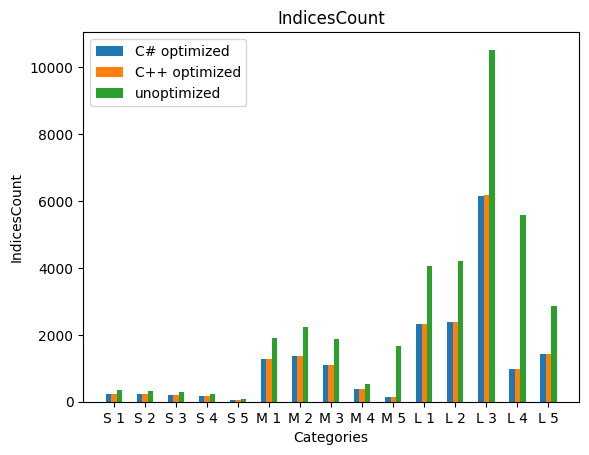

In [24]:

positions = np.arange(len(labels))
bar_width = 0.35

plt.bar(positions - bar_width/2, [row["IndicesCount"] for row in data_csharp], width=bar_width/2, label='C# optimized')

plt.bar(positions , [row["IndicesCount"] for row in data_cpp], width=bar_width/2, label='C++ optimized')

plt.bar(positions + bar_width/2 , [row["IndicesCount"] for row in data_json], width=bar_width/2, label='unoptimized')
plt.xlabel('Categories')
plt.ylabel('IndicesCount')
plt.title('IndicesCount')
plt.xticks(positions, labels)
plt.legend()

plt.show()

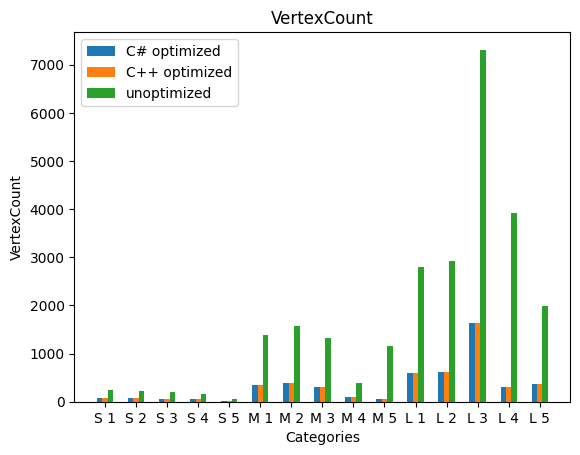

In [23]:
positions = np.arange(len(labels))
bar_width = 0.35

plt.bar(positions - bar_width/2, [row["VertexCount"] for row in data_csharp], width=bar_width/2, label='C# optimized')

plt.bar(positions , [row["VertexCount"] for row in data_cpp], width=bar_width/2, label='C++ optimized')

plt.bar(positions + bar_width/2 , [row["VertexCount"] for row in data_json], width=bar_width/2, label='unoptimized')
plt.xlabel('Categories')
plt.ylabel('VertexCount')
plt.title('VertexCount')
plt.xticks(positions, labels)
plt.legend()

plt.show()